In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["text.usetex"] = True

In [2]:
from starfish.set import settings

In [3]:
def plot_ellipse(mean,cov,ax,label):
    mean=np.array(mean)
    cov=np.array(cov)
    
    if cov.shape!=(2,2):
        raise ValueError(f'the covariance matrix must be of shape (2,2), but {cov.shape} is given!')
    elif not np.allclose(cov[0,1],cov[1,0]):
        raise ValueError(f'the input matrix is not symmetric, with (0,1)-element being {cov[0,1]} and (1,0)-element being {cov[1,0]}!')
    elif not np.all(np.linalg.eigvals(cov)>0):
        raise ValueError(f'the input matrix is not positive definite! i.e. all of its eigen values must be positive.')

    l1=(cov[0,0]+cov[1,1])/2+np.sqrt(((cov[0,0]-cov[1,1])/2)**2+cov[0,1]*cov[1,0])
    l2=(cov[0,0]+cov[1,1])/2-np.sqrt(((cov[0,0]-cov[1,1])/2)**2+cov[0,1]*cov[1,0])
    
    if np.allclose(cov[0,1],0): # actually no rotation
        if cov[0,0]>=cov[1,1]:
            angle=0
        else:
            angle=np.pi/2
    else:
        angle=np.arctan2(l1-cov[0,0],cov[0,1])

    t=np.linspace(0,2*np.pi,num=1000)
    
    A=np.sqrt(6.18)
    # for A in np.sqrt([2.3,6.18]):
    x=A*(np.sqrt(l1)*np.cos(angle)*np.cos(t)-np.sqrt(l2)*np.sin(angle)*np.sin(t))
    y=A*(np.sqrt(l1)*np.sin(angle)*np.cos(t)+np.sqrt(l2)*np.cos(angle)*np.sin(t))
    ax.plot(x+mean[0],y+mean[1],label=label)
    ax.plot(mean[0],mean[1],'r+',markersize=10)

In [4]:
def get_axes(var_order1,var_order2):
    index1=[]
    index2=[]
    for index,var_order in ((index1,var_order1),(index2,var_order2)):
        for v in var_order:
            try:
                i,=np.where(np.array(settings.var_name)==v)
                index.append(i[0])
            except:
                raise ValueError(f'cannot find {v} in var_name!')
    
    x_num=len(var_order1)
    y_num=len(var_order2)
    
    fig, axes = plt.subplots(y_num, x_num, sharex='col',squeeze=False)
    fig.set_dpi(250)
    fig.set_size_inches(len(var_order1)/7*8,len(var_order2)/7*8)
    fig.subplots_adjust(hspace=0,wspace=0)
    
    if index1==index2:
        for i in range(y_num): # y
            for j in range(x_num): # x
                if j>i: # upper triangle
                    axes[i, j].axis('off')
                else:
                    if j==0:
                        axes[i,j].set_ylabel(settings.var_exp[index2[i]],fontsize='large')
                    if i==y_num-1:
                        axes[i,j].set_xlabel(settings.var_exp[index1[j]],fontsize='large')
                        axes[i,j].tick_params(axis='x',labelrotation=45)
                    
                    if i==j: # diagonal
                        axes[i,j].tick_params(bottom=True, top=False, left=False,right=False,direction='in')
                        axes[i,j].set_yticks([])
                        axes[i,j].set_ylabel('')
                    else: # lower triangle
                        axes[i, j].tick_params(length=5,bottom=True, top=True, left=True,right=True,direction='in')
                        if j>0:
                            axes[i,j].sharey(axes[i,j-1])
                            axes[i,j].tick_params(labelleft=False)
    else:
        for i in range(y_num): # y
            for j in range(x_num): # x
                    if j==0:
                        axes[i,j].set_ylabel(settings.var_exp[index2[i]],fontsize='large')
                    if i==y_num-1:
                        axes[i,j].set_xlabel(settings.var_exp[index1[j]],fontsize='large')
                        axes[i,j].tick_params(axis='x',labelrotation=45)
                    
                    axes[i, j].tick_params(length=5,bottom=True, top=True, left=True,right=True,direction='in')
                    
                    if j>0:
                        axes[i,j].sharey(axes[i,j-1])
                        axes[i,j].tick_params(labelleft=False)

    return fig,axes,index1,index2

In [5]:
def get_xlim(ax,i):    
    if i==np.where(np.array(settings.var_name)=='m_nu')[0][0]:
        ax.set_xlim(0)
    # if i==np.where(np.array(settings.var_name)=='h')[0][0]:
    #     ax.set_xlim(0.64,0.7)
    # elif i==np.where(np.array(settings.var_name)=='omega_m0')[0][0]:
    #     ax.set_xlim(0.29,0.34)
    # elif i==np.where(np.array(settings.var_name)=='omega_b0')[0][0]:
    #     ax.set_xlim(0.044,0.054)
    # elif i==np.where(np.array(settings.var_name)=='sigma_8')[0][0]:
    #     ax.set_xlim(0.78,0.84)
    # elif i==np.where(np.array(settings.var_name)=='n_s')[0][0]:
    #     ax.set_xlim(0.95,0.97)
    # elif i==np.where(np.array(settings.var_name)=='m_nu')[0][0]:
    #     ax.set_xlim(0,0.2)
    # elif i==np.where(np.array(settings.var_name)=='N_eff')[0][0]:
    #     ax.set_xlim(2.8,3.3)
        
def get_ylim(ax,i):  
    if i==np.where(np.array(settings.var_name)=='m_nu')[0][0]:
        ax.set_ylim(0)
    # if i==np.where(np.array(settings.var_name)=='h')[0][0]:
    #     ax.set_ylim(0.64,0.7)
    # elif i==np.where(np.array(settings.var_name)=='omega_m0')[0][0]:
    #     ax.set_ylim(0.29,0.34)
    # elif i==np.where(np.array(settings.var_name)=='omega_b0')[0][0]:
    #     ax.set_ylim(0.044,0.054)
    # elif i==np.where(np.array(settings.var_name)=='sigma_8')[0][0]:
    #     ax.set_ylim(0.78,0.84)
    # elif i==np.where(np.array(settings.var_name)=='n_s')[0][0]:
    #     ax.set_ylim(0.95,0.97)
    # elif i==np.where(np.array(settings.var_name)=='m_nu')[0][0]:
    #     ax.set_ylim(0,0.2)
    # elif i==np.where(np.array(settings.var_name)=='N_eff')[0][0]:
    #     ax.set_ylim(2.8,3.3)


In [6]:
def get_figure(cov_list,labels,var_order1,var_order2=None):
    if var_order2==None: var_order2=var_order1
    
    fig,axes,index1,index2=get_axes(var_order1,var_order2)
    cov_all_sub=np.empty((2,2))

    if index1==index2:
        for zi,cov_all in enumerate(cov_list):
            for i in range(len(index2)):
                for j in range(len(index1)):
                    y=index2[i]
                    x=index1[j]
                    mean=np.array(settings.cosmo_value)[[x,y]]
                    
                    if i>j:  
                        cov_all_sub[0,0]=cov_all[x,x]
                        cov_all_sub[1,1]=cov_all[y,y]
                        cov_all_sub[0,1]=cov_all[x,y]
                        cov_all_sub[1,0]=cov_all[y,x]
                        
                        plot_ellipse(mean=mean,cov=cov_all_sub,ax=axes[i,j],label=f'{labels[zi]}')
                        
                        get_ylim(axes[i,j],y)
                        get_xlim(axes[i,j],x)
                        
                    elif i==j:
                        scale=np.sqrt(cov_all[x,x])
                        array=np.linspace(mean[0]-3*scale,mean[0]+3*scale,100)
                        prob=norm.pdf(array,loc=mean[0],scale=scale)
                        
                        axes[i,j].plot(array,prob/np.max(prob))
                        
                        get_xlim(axes[i,j],x)
                        
        handles, labels = axes[-1,-2].get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=(0.8,0.8))

    else:
        for zi,cov_all in enumerate(cov_list):
            for i in range(len(index2)):
                for j in range(len(index1)):
                    y=index2[i]
                    x=index1[j]
                    mean=np.array(settings.cosmo_value)[[x,y]]
                    
                    cov_all_sub[0,0]=cov_all[x,x]
                    cov_all_sub[1,1]=cov_all[y,y]
                    cov_all_sub[0,1]=cov_all[x,y]
                    cov_all_sub[1,0]=cov_all[y,x]
                    
                    plot_ellipse(mean=mean,cov=cov_all_sub,ax=axes[i,j],label=f'{labels[zi]}')
                    
                    get_ylim(axes[i,j],y)
                    get_xlim(axes[i,j],x)
    
        handles, labels = axes[-1,-2].get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=(1.0,1.0))

    return fig

In [7]:
fisher1=pd.read_excel('../../planck15_vs_fisher/w0wacdm/fisher.xlsx',header=0,index_col=0)
fisher2=pd.read_excel('all.xlsx',header=0,index_col=0)

In [8]:
cov=[]
for fisher in [fisher1,fisher2]:
    cov.append(np.linalg.inv(fisher.values))

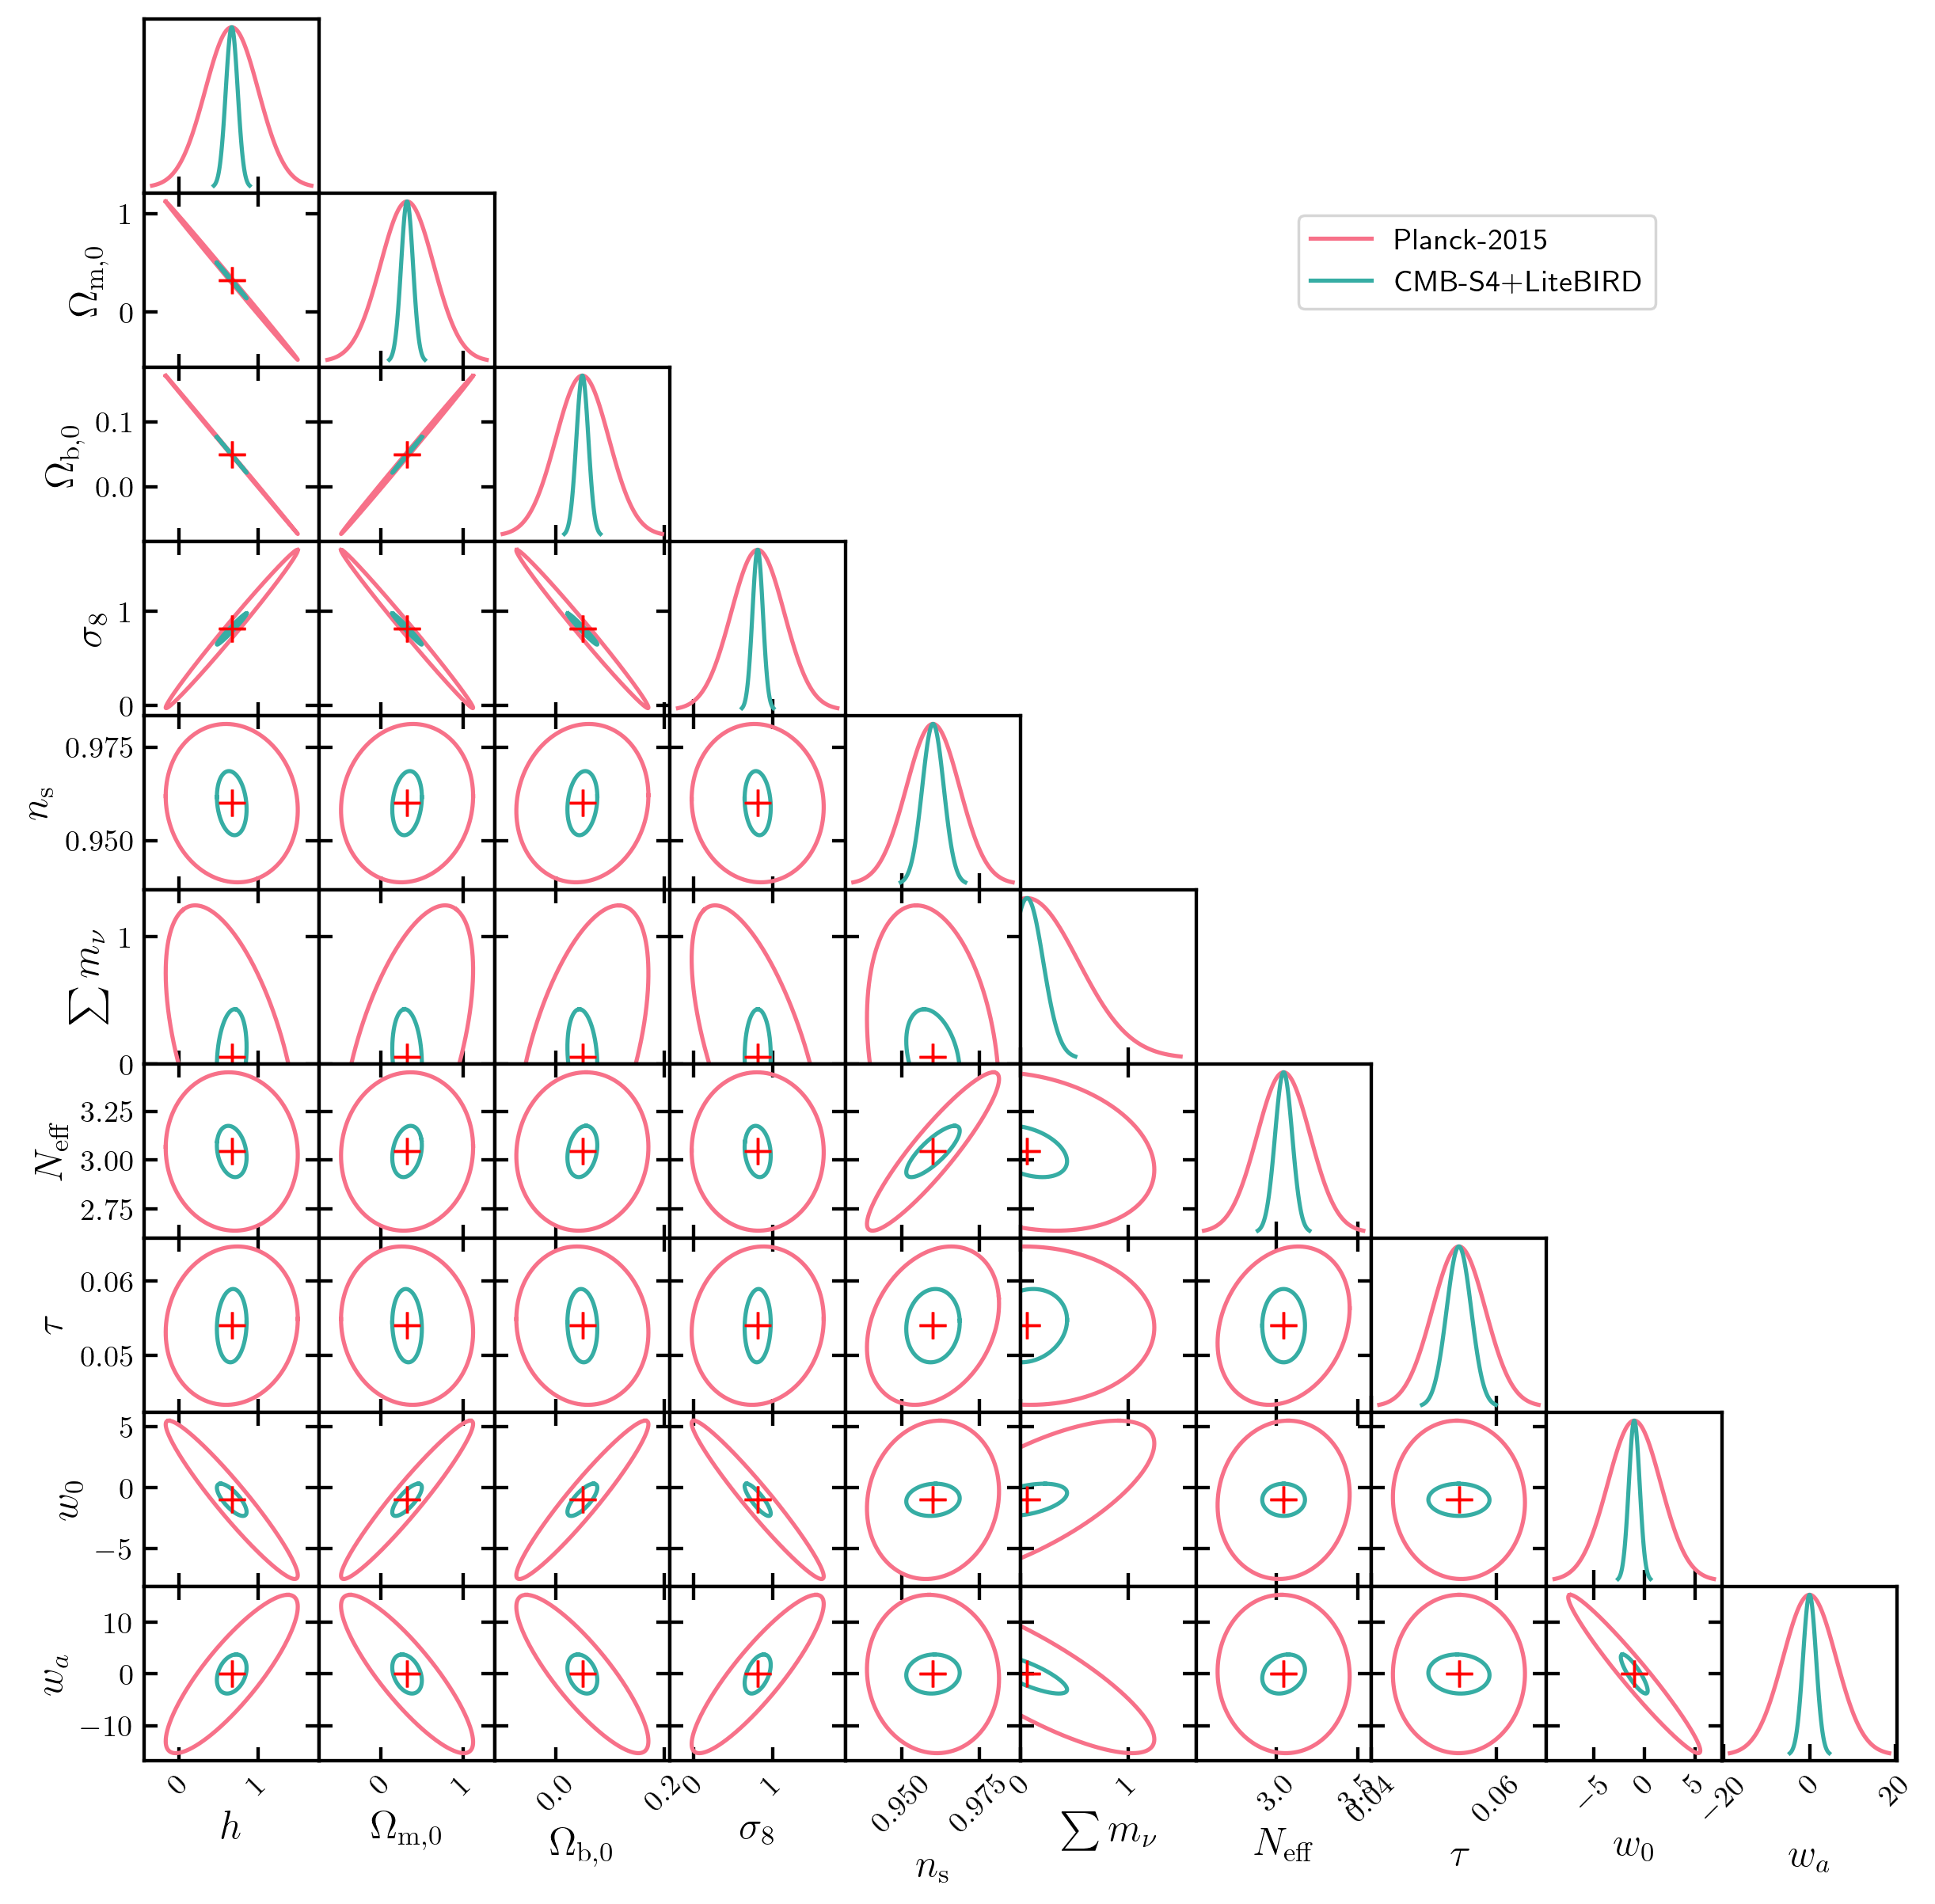

In [9]:
import seaborn as sns
sns.set_palette('husl',2)
fig=get_figure(cov,['Planck-2015','CMB-S4+LiteBIRD'],['h','omega_m0','omega_b0','sigma_8','n_s','m_nu','N_eff','tau','w0','wa'])